# 2 確率統計の基礎

- **[2.1 確率・統計の基礎](#2.1-確率・統計の基礎)** 
    - [2.1.1 記述統計学](#2.1.1-記述統計学)
    - [2.1.2 確率](#2.1.2-確率)
    - [2.1.3 確率変数と確率分布](#2.1.3-確率変数と確率分布)
    - [2.1.4 （応用）多次元確率分布](#2.1.4-（応用）多次元確率分布)
    - [2.1.5 標本分布](#2.1.5-標本分布)
    - [2.1.6 統計的推定](#2.1.6-統計的推定)
    - [2.1.7 統計的検定](#2.1.7-統計的検定)
    - [2.1.8 単回帰分析](#2.1.8-単回帰分析)
<br><br>
- **[2.2 総合問題](#2.2-総合問題)**
    - [2.2.1 統計の基礎と回帰分析](#2.2.1-統計の基礎と回帰分析)
    - [2.2.2 ローレンツ曲線とジニ係数](#2.2.2-ローレンツ曲線とジニ係数)

***

## 2.1 確率・統計の基礎

ゴール：確率と統計の基礎的な理解と計算ができる

In [16]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

### 2.1.1 記述統計学
キーワード：記述統計学、量的データ、質的データ、ヒストグラム、四分位範囲、要約統計量、平均、分散、標準偏差、変動係数、散布図、相関係数

これまではPythonといくつのモジュールについての基本的な使い方を説明してきました。2章からはそれらを活用して、実際のデータと対話してみましょう。次は、今回使うデータ（Zipファイル）をウェブ上から直接ダウンロードし、展開するためのモジュールになります。

In [17]:
# webからデータを取得したり、zipファイルを扱うためのモジュール
import requests, zipfile
from io import StringIO
import io

コマンドライン等に慣れていな人のため、次のコマンドは現在どこのディレクトリ（フォルダ）にいるか出力するための命令です。

In [1]:
pwd

'/root/userspace'

この章のためにフォルダを作成しましょう。以下の「mkdir name」はnameというフォルダを作成します。

In [2]:
mkdir chap2

次の「cd adress」は該当のディレクトリに移動するコマンドです。

In [6]:
cd ./chap2

C:\Users\kecy\Documents\データサイエンス\東大GCI\chap2


次に、該当のデータをネットを経由してダウンロードし、展開しましょう。以下がその処理となります。以下の2行目はデータがあるurlの指定をして、zipファイルを取得し、展開しています。データがちゃんとダウンロードされ、展開しているかチェックしましょう。次のコマンド「ls」を実行すると、今いるフォルダにあるファイル等を表示します。

今のフォルダにあるデータ等を全て表示します。

In [9]:
# データがあるurl の指定
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

ConnectionError: HTTPConnectionPool(host='archive.ics.uci.edu', port=80): Max retries exceeded with url: /ml/machine-learning-databases/00356/student.zip (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000001CA93B2128>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [10]:
ls

 ドライブ C のボリューム ラベルは OS です
 ボリューム シリアル番号は 144C-A546 です

 C:\Users\kecy\Documents\データサイエンス\東大GCI\chap2 のディレクトリ

2017/04/22  12:38    <DIR>          .
2017/04/22  12:38    <DIR>          ..
2017/04/22  12:38             3,206 student.txt
2017/04/22  12:38            56,993 student-mat.csv
2017/04/22  12:38               269 student-merge.R
2017/04/22  12:38            93,220 student-por.csv
               4 個のファイル             153,688 バイト
               2 個のディレクトリ   6,934,999,040 バイトの空き領域


この講座で使うデータは、「student-mat.csv」と「student-por.csv」になります。はじめに、「student-mat.csv」がどんなデータが観察し、練習問題で2つ合わせたデータを使うことにします。

次は、対象のデータファイル名を記載し、データをpandasのデータフレームとして扱います。読み込むと以下のようになります。

In [18]:
student_data_math = pd.read_csv("student-mat.csv")

データを読み込んだ後は、実際にこのデータにどんなカラムやデータが入っているかサンプルを見てみましょう。その場合、head()を使います。デフォルトでは5行表示されますが、行数を指定したい場合は、head(10)などとします。

In [19]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


データが入っているのはわかりますが、このままではデータが大変扱いにくいです。よくデータを見てみると、区切り文字は「;」となっています。実は、このread_csvはsepのパラメータ設定が可能で、区切り文字を指定できます。この区切り文字は、csvファイルだと「,」であることがほとんどで、デフォルトはこれで設定されていますが、今回は「;」ですので、これを区切り文字として指定して、データを再度読み込みましょう。

In [20]:
# データの読み込み
# 区切りが;ついているので注意
student_data_math = pd.read_csv("student-mat.csv",sep=";")

In [21]:
# どんなデータがあるかざっと見る
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


これでだいぶ見やすくなりました。なお、教科書的には、いきなり「;」で設定してやることが多いのですが、まだ何も知らない見たこともないデータに対して、1回の処理でそれがわかるというのは難しいです。データ分析の実務ではこういう試行錯誤があることも度々ありますので、あえてそのまま実施してみました。

また、この「read_csv」については、パラメータがいくつかあり、データ名（アドレス含む）、区切り文字、ヘッダーがあるかないかを指定します。詳しくは、?pd.read_csvを実行して、どんなパラメータ等が設定できるのか調べてみましょう。

In [370]:
?pd.read_csv

データを見てみますと、schoolやageなど学生の属性情報が入っているようだというのはわかります。ただし、いくつデータがあるのか、どんなデータの種類があるのかまだわかりませんので、次のinfoを使うとすべての変数について、nullでないデータの個数や変数の型がわかります。

In [371]:
# すべてのカラムの情報等チェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

今回はnullのデータがないようです。さらにこのデータを理解していくために、このカラムが一体何のデータなのか把握していきましょう。

実際のビジネスの現場では、このデータに詳しい人に情報をもらったり、またデータの仕様書を読み込んでいく必要があります。そういった情報が得られたという前提の下、以下に、このデータカラム名の説明等を記載します。student.txtファイルに詳しいことが書いてあります。シェルやコマンドライン等に慣れている人は、ここで**less ファイル名**でその中身を見ることができます。

#### データの属性説明

1 school - 学校(binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)<br>
2 sex - 性 (binary: "F" - female or "M" - male)<br>
3 age - 年齢 (numeric: from 15 to 22)<br>
4 address - 住所のタイプ (binary: "U" - urban or "R" - rural)<br>
5 famsize - 家族の人数 (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)<br>
6 Pstatus - 両親と同居しているかどうか (binary: "T" - living together or "A" - apart)<br>
7 Medu - 母親の学歴 (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
8 Fedu - 父親の学歴 (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
9 Mjob - 母親の仕事 (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
10 Fjob - 父親の仕事 (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
11 reason - 学校を選んだ理由 (nominal: close to "home", school "reputation", "course" preference or "other")<br>
12 guardian - 生徒の保護者 (nominal: "mother", "father" or "other")<br>
13 traveltime - 通学時間 (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 studytime - 週の勉強時間(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 failures - 過去のnumber of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 schoolsup - 追加の教育サポート (binary: yes or no)<br>
17 famsup - 家族の教育サポート (binary: yes or no)<br>
18 paid - 追加の有料クラス(Math or Portuguese) (binary: yes or no)<br>
19 activities - 学校外の活動 (binary: yes or no)<br>
20 nursery - 保育園に通ったことがあるかどうか (binary: yes or no)<br>
21 higher - 高い教育を受けたいかどうか(binary: yes or no)<br>
22 internet - 家でインターネットのアクセスができるかどうか(binary: yes or no)<br>
23 romantic - 恋愛関係 (binary: yes or no)<br>
24 famrel - 家族との関係性 (numeric: from 1 - very bad to 5 - excellent)<br>
25 freetime - 学校後の自由時間 (numeric: from 1 - very low to 5 - very high)<br>
26 goout - 友人と遊ぶかどうか (numeric: from 1 - very low to 5 - very high)<br>
27 Dalc - 平日のアルコール摂取量 (numeric: from 1 - very low to 5 - very high)<br>
28 Walc - 週末のアルコール摂取量 (numeric: from 1 - very low to 5 - very high)<br>
29 health - 現在の健康状態 (numeric: from 1 - very bad to 5 - very good)<br>
30 absences - 学校の欠席数 (numeric: from 0 to 93)<br>
31 G1 - 一期の成績 (numeric: from 0 to 20)<br>
31 G2 - 二期の成績 (numeric: from 0 to 20)<br>
32 G3 - 最終の成績 (numeric: from 0 to 20, output target)

さて、上記のデータを見ていると、数字のデータがあったり、男女などの属性データがあったります。データは基本的に、量的データと質的データに分けることができます。

・**量的データ**：比率データ、間隔データ

・**質的データ**：順位データ、カテゴリデータ

集計やモデリングの際に気をつけて扱いましょう。

次は先ほど読み込んだデータの中にある「性別」を指定しています。このデータは特に数値化されておらず、比較もできないので、質的データになります。

In [372]:
student_data_math.sex.head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

次は、データの列にある「欠席数」を指定しています。このデータは量的データになります。

In [373]:
student_data_math.absences.head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

ここで、前に学んだpandasのテクニックを使って、性別を軸にして、年齢の平均値をそれぞれ計算してみましょう。

In [376]:
student_data_math.groupby('sex')["age"].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

簡単ではありましたが、データの中身についてカラムやその数字等を見てきました。他にも、いろいろな視点やデータ集計ができると思いますので、何か仮説を持って（男性の方がアルコール摂取量が多い、など）、その仮説があっているかどうか実装して確かめてみましょう。

>**[やってみよう]**

>読み込んだデータを使って、いろいろな視点でデータ集計して、データと対話してみましょう。どんな仮説を考えますか。また、その仮説を確かめるために、どのような実装をしますか。

次はこのデータを使って、本題の**記述統計**について学びます。統計解析は、基本的に二つに分けることができ、ここで学ぶ**記述統計**と次の**推測統計**があります。**記述統計**とは、データをまとめて見やすく整理し、データの持っている概ねの情報を把握することを目的にしています。一方、**推測統計**とは、確率分布に基づいたモデルを用いて精密な解析を行うことです。

まずは、このデータの中にある欠席数について考えてみることにします。サンプルを見て、10や2や色々と数字がありました。それぞれの数字がいったいどれくらいあるのか観測するのが、次のヒストグラムです。前のデータの可視化で学びましたね。matplotlibを使って、histでそのグラフを表示させます。

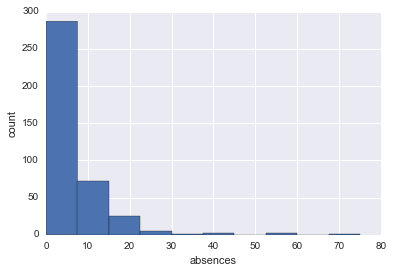

In [123]:
# histogram、データの指定
plt.hist(student_data_math.absences)

# それぞれのラベル
plt.ylabel("count")
plt.xlabel("absences")
# グリッドをつける
plt.grid(True)

0から10までの数字付近が多くなっており、また70以上など(の数字)もあり、テールな分布になっています。このヒストグラムは、データの全体像を見る上では欠かせないものですが、どのような時にデータが偏っているといえるのかなど、客観性が少し乏しくなります。そのため、次の要約統計量（中央値、平均、標準偏差など）について計算することで、データの傾向を数値化することができます。

In [378]:
# 平均値
print("平均値：",student_data_math.absences.mean())
# 中央値：データの真ん中の値、外れ値の値に影響を受けにくい
print("中央値：",student_data_math.absences.median())
# 最頻値：最も頻度が多い値
print("最頻値：",student_data_math.absences.mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64


なお、平均値の計算は以下となります（ここで$x_i$を第$i$番目のデータ（値）とします）。

\begin{eqnarray}
\overline{x}=\frac{1}{n}\sum^n_{i=1}x_i
\end{eqnarray}

次に、このデータが散らばっているのか、それともまとまっている（平均付近に固まっている）のかを調べるのが分散になり、式は以下です。

\begin{eqnarray}
\sigma^2 = \frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}

該当の変数を指定した後に、var()で計算できます。

In [212]:
# 分散
student_data_math.absences.var()

64.050

標準偏差は分散の平方根となります。

In [86]:
# 標準偏差 σ
student_data_math.absences.std()

8.003

np.sqrtで平方根の計算ができますので、以下の方法で出しても同じなります。

In [270]:
np.sqrt(student_data_math.absences.var())

8.003

これまで、1つ1つ統計量を見てきましたが、該当のデータの後（pandasで読み込んだデータ）にdescribe()を使うことで、一気にそれらの数値を確認することができます。それぞれ順にデータ数、平均値、標準偏差、最小値、25、50、75パーセントタイル、そして最大値になります。

In [88]:
# 要約統計量
student_data_math.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

データのタイプとしては、Seriesになるので、それぞれの要素を抽出することができます。例えば、**四分位範囲**という75%タイルと25%タイルの差を計算したい場合は、上から5番目と7番目の要素になるので、それらを使います。

In [31]:
type(student_data_math.absences.describe())

pandas.core.series.Series

In [89]:
# 四分位範囲(75%タイル ー 25%タイル)
student_data_math.absences.describe()[6] - student_data_math.absences.describe()[4]

8.000

さらに、列名を固定しない場合は、量的データに関しては、describe()を使って一気に算出することができます。

In [383]:
#　要約統計量まとめて計算
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


さて、これまで最大値、最小値、中央値、四分位範囲等を算出してきましたが、それらをグラフ化してくれるのが、次の箱ひげ図です。1期目の成績G1と、欠席数の箱ひげ図をそれぞれ書いていますが、特徴としてかなり異なるのがわかります。箱の上底が第3四分位点、下底が第1四分位点、真ん中の線が中央値です。これで扱うデータの範囲等がわかります。

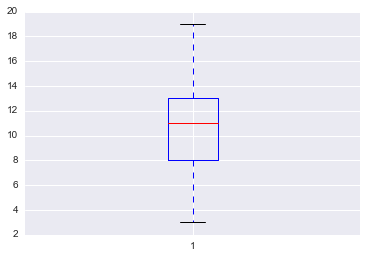

In [311]:
# 箱ひげ図：G1
plt.boxplot(student_data_math.G1)
plt.grid(True)

In [ ]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math.absences)
plt.grid(True)

>**[やってみよう]**

>他の変数についても、箱ひげ図を表示させてみましょう。どんな図になっているでしょうか。そこから何かわかることがないか考察してみましょう。

同時に複数の箱ひげ図を表示することも可能です。

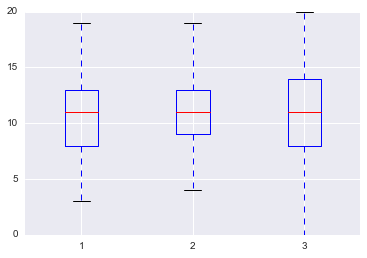

In [406]:
# 箱ひげ図：G1,G2,G3
plt.boxplot([student_data_math.G1,student_data_math.G2,student_data_math.G3])
plt.grid(True)

次に、**変動係数**です。先ほど、分散や標準偏差について見てきましたが、異なる種類のデータですと、これらの単純比較はできません。データの大きさがそもそも異なると、大きな値をとるものの方が偏差も大きくなる傾向にあるからです。そこで、以下の変動係数を使って、スケールに依存せず、比較が可能となります。

\begin{eqnarray}
CV = \frac{\sigma}{\overline{x}}\
\end{eqnarray}

In [90]:
# 変動係数：欠席数
student_data_math.absences.std()/student_data_math.absences.mean()

1.402

なお、describe()に変動係数はありませんが、以下のように一気に算出することも可能です。落第数（failures）と欠席数（absences）のデータの散らばり具合が大きいことがわかります。

In [92]:
#　それぞれの変動係数をまとめて計算
student_data_math.std() / student_data_math.mean() 

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

さて、これまでは基本的に1変数のみに着目をして、グラフや要約統計量を算出してきました。次は、変数間の関係性を見ていく散布図と相関係数について学びましょう。次の散布図は1期目の成績G1と最終成績G3の図です。

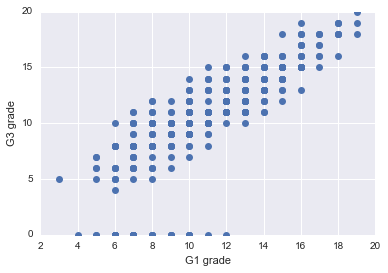

In [124]:
# 散布図
plt.plot(student_data_math.G1,student_data_math.G3,'o')

# ラベル
plt.ylabel("G3 grade")
plt.xlabel("G1 grade")
plt.grid(True)

初めから成績がいい人ほど後の成績もいいというのは当たり前の結果ですが、傾向としてはっきりと表れているのがグラフからわかります。

補足ですが、ここで、グラフをよく見てみると、最終成績(G3,Y軸）が0である人がいるのがわかります。一期の成績で0である人はいなかったので、これが異常値なのか、正しい値なのかはデータを見ているだけでは判断できませんが、データとして成績のスコアが0から20とあるので、正しい値だと判断し、このままで扱いましょう。ビジネスの現場では、なぜこのような値になっているか原因を突き止めるため、このデータに詳しい人、システム関係の人たちとヒアリングしながら理解していきます。もし、欠損値等であった場合には、対処方法は色々とありますが、次の章で学ぶことにしましょう。

次に、その2変数の関係性について、数値化してみることを考えます。それが、相関係数です。数式は以下になります。

\begin{eqnarray}
r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n 
(y_i - \overline{y})^2}}
\end{eqnarray}

この相関係数は、-1から1までの値を取り、1に近ければ近いほど**正の相関**があるといい、−1に近ければ近いほど**負の相関**があるといいます。0の場合は、**無相関**であるといいます。

Pythonの実装は、scipyのピアソン関数を使って、2変数の相関係数を算出しています。

In [99]:
sp.stats.pearsonr(student_data_math.G1,student_data_math.G3)

(0.801, 0.000)

0.8と相関関係がある高い数字が出ました。この数字については、厳密に高い低いというのはなく、またこれが高いからといって**因果関係**があるとは言えないので注意しましょう。（なお、この講座では詳しく扱いませんが、因果関係を把握したい場合には、**実験計画法**と言われるアプローチ等を使っていきます。具体的には、あるマーケティング施策で、ある広告を見て効果があったのかなかったのか、因果関係を知りたい場合に、広告を見せる処置群と何も広告を見せないコントロール群に分けて、その比率等を計算していきます。）

次の計算は、相関行列を算出しています。それぞれの変数について、すべての組み合わせで相関係数を算出しています。先ほどのG1とG3の相関係数は0.801となり、また自分自身の相関係数は1になるのが自明ですので、以下のようになります。

In [317]:
# 相関行列
np.corrcoef([student_data_math.G1,student_data_math.G3])

array([[ 1.   ,  0.801],
       [ 0.801,  1.   ]])

また、共分散行列は以下になります。共分散とは、2組の対応するデータ間での平均からの偏差の積に関する平均値です。2変数以上の分散を考えるときに使われます。共分散行列の(1,1)と(2,2)の要素（11.017と20.99）を見てみると、G1とG3の分散と等しいのがわかります。

In [101]:
# 共分散行列
np.cov(student_data_math.G1,student_data_math.G3)

array([[ 11.017,  12.188],
       [ 12.188,  20.99 ]])

In [385]:
# 分散
print("G1の分散:",student_data_math.G1.var())
print("G3の分散:",student_data_math.G3.var())

G1の分散: 11.017053267364899
G3の分散: 20.989616397866737


参考ですが、最後に、各変数をすべてヒストグラムにしたり、散布図を描く方法を紹介します。seabornのsns.pairplotを使います。色々な変数の関係性を一度に確認できるので、とても便利です。ただし、変数が多いと、計算時間に時間がかかり、若干見にくくなりますが、その時はPandasで学んだ変数を絞り込むなどして、計算を実行してください。

サンプルとして、先ほどのデータにて、アルコールの摂取量と成績のスコアに関係があるのか、見てみましょう。Dalcは平日のアルコール摂取量、Walcは週末のアルコール摂取量で、それらと1期目の成績（G1）、最終成績(G3)の関係を見ています。アルコールを飲むからといって、成績が悪いと言えるのでしょうか。それとも関係ないのでしょうか。

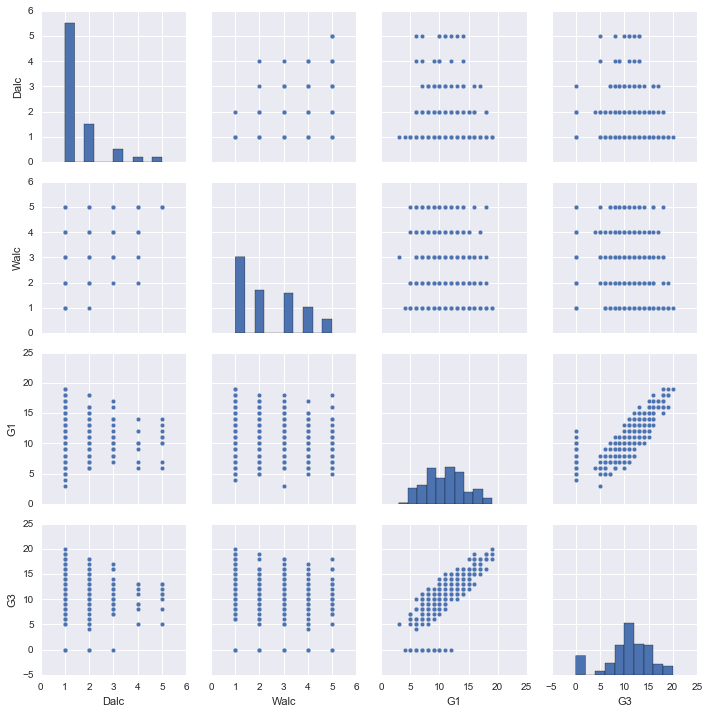

In [423]:
sns.pairplot(student_data_math[["Dalc","Walc","G1","G3"]])
plt.grid(True)

In [429]:
# 例：週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby("Walc")["G1"].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

グラフから、平日アルコールを頻繁に飲んでいる人（4や5の人）はG3で好成績を取っている人はいないようですが、極端に悪い成績を取っている人もいないようです。また、週末にアルコールを飲まない人の方が1期目の成績は少し良さげみますが、これを結論付けて良いのでしょうか。これらのグラフや数値だけでは、なかなか判断が難しいですが、次の統計アプローチや機械学習の章でもアプローチしてみます。

以上で、記述統計に関する基礎的事項は終了になります。とても基本的な箇所ですが、どんなデータ分析をするにしても、データの全体像をつかむためには、必要な作業となります。

この講座では、機械学習のライブライリー等を使って、簡単に機械学習の計算ができることを紹介していきます。一方で、今までやってきた基礎的な統計量を見ていくことも大事であることは強調しておきます。簡単な散布図を書くだけで重要な傾向がわかったりすることもあります。また、ここまでの内容はおそらく数学的なバックグラウンドがない人でもついていきやすく、説明がしやすいです。

もちろん、これだけで終わるならば、機械学習は必要なくなりますが、機械学習を適応する前に、データと対話をして、不明事項や異常値等の確認について関係者と密に連携をとっておけば、よりよいデータ分析ができます。

>**[ポイント]**

>データ分析をするときにはまず基本統計量やヒストグラム、散布図等を見て、データの全体像を掴もう。

#### <練習問題 1>

studet-por.csvを読み込んで、要約統計量を表示してください。

#### <練習問題 2>

以下の変数をキーとして、先ほどの数学のデータとポルトガル語のデータ結果をマージしてください。マージするときは、両方ともデータが含まれているデータを対象としてください（内部結合と言います）。そして、要約統計量など計算してください。なお、以下以外の変数名は、重複がありますので、suffixes=('_math', '_por')のパラメータを追加して、どちらからのデータかわかるようにしてください。

["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

#### <練習問題 3>

上記のマージしたデータについて、変数を幾つかピックアップして、散布図とヒストグラムを作成してみましょう。どういった傾向がありますか。また、数学データのみの結果と違いはありますか。考察してみましょう。

### 2.1.2 確率
キーワード：確率、試行、根元事象、標本空間、事象、条件付き確率、ベイズの定理、事前確率、事後確率

ここからは確率の概念等について学び、少し理論的なお話に入ります。数式が若干多くなり、はじめは少しとっつきにくいですが、徐々に慣れていきましょう。

まず、サイコロを例に、確率を学ぶ上で必要となる用語や概念について説明していきます。サイコロが取りうる状態は、1から6の数字であり、以下のような実装を考えます。

In [7]:
# サイコロと見なしたデータ
# 注意：配列は順番が考慮されているので、厳密には集合ではないが、集合とみなす
dice_data = np.array([1,2,3,4,5,6])

次の処理は、上のデータから1つだけランダムに抽出しており、これを**試行**といいます。サイコロを1回ふることと同じと思ってもらえばよいです。

In [8]:
from numpy import random
random.seed(0)
print("1つだけランダムに抽出:",random.choice(dice_data,1))

1つだけランダムに抽出: [5]


上記の結果は、「5」が抽出されており、他にも「1」や「3」などもあり、この試行結果を**根元事象（基本事象）**といいます。また、すべての可能な根元事象を集めた集合を**標本空間(以下Sで表します)**、標本空間の任意の部分集合を**事象**といいます。例えば、先ほどの1が出る事象Xや、以下のような偶数の事象Eなどが考えられます。

\begin{eqnarray}
S=\{1,2,3,4,5,6\}
\end{eqnarray}

\begin{eqnarray}
X=\{1\}
\end{eqnarray}

\begin{eqnarray}
E=\{2,4,6\}
\end{eqnarray}

他、空集合Φも事象としてあり、**空事象**といい、決して起こりえない事象です。例えば、7の目が出ることは普通のサイコロではないので、確率は0となります。ここで、「確率」という言葉を使いましたが、その公理は以下となります。

>ある事象Eが起こる確率をP(E)と記せば、次の公理を満たさなければならない。
>
>P1：  任意の事象Eについて、0≦P(E)≦1
>
>P2：  P(S)=1
>
>P3：  A∩B=Φ ならば、P(A∪B) = P(A) + P(B)

なお、Eに属さない結果の集合を**余事象**といいます。これは、Eの**補集合**に対応し、以下のように表します。

\begin{eqnarray}
E^c=\{1,3,5\}
\end{eqnarray}

A∩Bは、積事象といい、2つの事象に共通な事象のことを指します。具体的には、

\begin{eqnarray}
A=\{1,2,3\}
\end{eqnarray}

\begin{eqnarray}
B=\{1,3,4,5\}
\end{eqnarray}

の2つの集合を考えた場合、共通している数字は1と3なので、

\begin{eqnarray}
A \cap B=\{1,3\}
\end{eqnarray}

となります。

A∪Bは、和事象といい、2つの事象の和のことを指します。上と同じAとBで考えると、以下となります。

\begin{eqnarray}
A \cup B=\{1,2,3,4,5\}
\end{eqnarray}

これらの事象が起こる確率を計算すると、

\begin{eqnarray}
P(X)=\frac{1}{6}
\end{eqnarray}

\begin{eqnarray}
P(\phi)= 0
\end{eqnarray}

\begin{eqnarray}
P(A \cap B)=\frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A \cup B)=\frac{5}{6}
\end{eqnarray}

になります。ここで計算したアプローチを数学的確率ということもあります。（厳密には、集合・位相論やルベーグ積分論等から入るのですが、ここでは割愛します。時間に余裕がある人やこれらの研究者の道に進む方は是非こちらから学んでください。）

次は実験的にサイコロを1000回ふるシミュレーションを実施してみます。それぞれの根元事象（1〜6）が実際に確率1/6で起きるのか、計算してみましょう。

In [9]:
# サイコロを1000回振ってみる
calc_steps = 1000

# seedの固定
random.seed(0)

# 1〜6のデータの中から、1000回の抽出を実施
count_all_dice = random.choice(dice_data,calc_steps)

In [10]:
# 計算結果を入れるための空箱
prob_data = np.array([])

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1,7):
    print(i,"が出る確率",len(count_all_dice[count_all_dice==i]) / calc_steps)
    prob_data = np.append(prob_data,len(count_all_dice[count_all_dice==i]) / calc_steps)

1 が出る確率 0.171
2 が出る確率 0.157
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.161
6 が出る確率 0.171


ほぼ1/6に近いのがわかります。これは**統計的確率**と言われます。この現象については後で詳しく学びます。

次に、条件付き確率と独立性について学びましょう。事象Aが生じた条件のもとで事象Bが生じる確率を、Aが与えられたもとでのBの条件付き確率といい、

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)} 
\end{eqnarray}

と表します（$P(A) >0$）。さらに以下のように式変形ができ、これを**乗法定理**といいます。

\begin{eqnarray}
P(A \cap B) = P(B|A)P(A)
\end{eqnarray}

条件付き確率は、背景情報に基づいた確率と考えることができます。具体的には、サイコロを1回振って、なんの数字だったかわからなかった(忘れた)としましょう。ただ、偶数だということがわかった場合に、その数字が4以上である確率を求めます。偶数であるという条件、ここでは

\begin{eqnarray}
A=\{2,4,6\}
\end{eqnarray}

と考え、数字が4以上である事象は、

\begin{eqnarray}
B=\{4,5,6\}
\end{eqnarray}

で、さらに

\begin{eqnarray}
A \cap B=\{4,6\}
\end{eqnarray}

であるため、上の条件付き確率の定義から、求める確率は以下となります。

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)}
       = \frac{\frac{2}{6}}{\frac{3}{6}}
       = \frac{2}{3}
\end{eqnarray}

次は、独立性の条件です。事象Aと事象Bがお互い独立であるとは、条件つき確率と確率が同じになり、

\begin{eqnarray}
P(A|B) = P(A)
\end{eqnarray}

になることをいいます。Bの事象がAに影響を及ぼしていないと考えることもできます。ここで、上の条件付き確率から以下が成立します。

\begin{eqnarray}
P(A \cap B) = P(A)P(B)
\end{eqnarray}

この式が成立しない場合は、事象AとBとはお互いに従属するといい、先ほどの例で考えると、

\begin{eqnarray}
P(A \cap B)= \frac{2}{6}= \frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A)P(B)= \frac{3}{6}\times\frac{3}{6}=\frac{1}{4}
\end{eqnarray}

で、等しくないため、独立ではなく、従属関係にあることがわかります。

最後に、ベイズの定理について紹介します。先ほど条件付き確率を考えましたが、ここで、$A$を結果の事象、$B$を原因1の事象、$B^c$を原因2の事象とする時、以下の**ベイズの定理**が与えられます。これは、Aという結果がわかっているときに、B事象の原因1である確率を求めるということを意味します。

\begin{eqnarray}
P(B|A) = \frac{P(A|B)P(B) }{P(A|B)P(B) + P(A|B^c)P(B^c)}
\end{eqnarray}

$P(B)$を**事前確率**、$P(B|A)$を**事後確率**、$P(A|B)$を**尤度**といいます。

以下は、一般のベイズ定理のバージョンです。離散の場合です。（$B_j$は俳反で和集合が全事象となるもの）

\begin{eqnarray}
P(B_i|A) = \frac{P(A|B_i)P(B_i) }{\sum_{j = 1}^k P(A|B_j)P(B_j)}
\end{eqnarray}

連続の場合もあり、後で紹介します。なお、実務ではベイズの定理が使われている場面も多く、例えば、迷惑メールの判定などあります。

#### <練習問題 1>

コインの表裏をそれぞれ0と1に対応させるデータを作成してください。また、コイン投げの試行を1000回した時の、表裏のそれぞれの出る確率を実装してください。

#### <練習問題 2>

くじ引きの問題を考えます。1000本のくじの中に、100本のあたりがあるとします。AくんとBくんが順にくじを引き、Aくん、Bくんが共にあたりを引く確率を求めてください。ただし、引いたくじは戻さないとします。（これは手計算でも大丈夫です。）

#### <練習問題 3>
日本国内である病気（X）になっている人の割合は、0.1%だとします。Xを発見する検査方法で、次のことがわかっています。

・その病気の人がその検査を受けると99%の人が陽性反応（病気である）を示します。

・その病気でない人がその検査を受けると3%の人が陽性反応を示します。（誤診）

日本に住んでいるある人がこの検査を受けたら陽性反応を示しました。この人が病気Xである確率は何%でしょうか？（これは手計算でも大丈夫です。）

***

### 2.1.3 確率変数と確率分布
キーワード：確率変数、確率関数、確率密度関数、一様分布、ベルヌーイ分布、二項分布、正規分布、ポアソン分布、対数正規分布

ここでは、確率変数と分布について学びます。まず、**確率変数**とは試行がもたらす事象を実数に結びつける関数のことをいいます。具体例としては、コインの裏表が出るそれぞれの事象があり、それぞれ1と-1などと対応付ける関数となります。先ほどのサイコロの例で考えると、1から6までの目があり、それぞれの目に対してその数字を対応させるものを確率変数といいます。このような離散的な確率変数(有限個、または数えられる数の値をとる確率変数)を**離散確率変数**といいます。

表にすると以下のようになります。(大文字Xは確率変数、小文字xはその実現値を指す)

|X|1|2|3|4|5|6|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|P(X)|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|

そして、確率変数が取るすべての値とその値が生じる確率を記述した関数を**確率関数**といい、数式を使うと以下になります。

\begin{eqnarray}
p(1)= \frac{1}{6},\ p(2)= \frac{1}{6},\ p(3)= \frac{1}{6},\ p(4)= \frac{1}{6},\ p(5)= \frac{1}{6},\ p(6)= \frac{1}{6}
\end{eqnarray}

ただし、以下を満たすとします。

\begin{eqnarray}
\sum^6_{i=1}p(x_i)=1
\end{eqnarray}

**分布関数（累積確率分布関数）**について、その定義は、確率変数Xが実数x以下になる確率をいい、F(x)として以下のように表す。

\begin{eqnarray}
F(x)=P(X \le x)=\sum_{x_{i} \le x}p(x_i)
\end{eqnarray}

確率変数が連続である場合（**連続確率変数**という）も同様に、分布関数が定義されます。次に、その分布関数の導関数を**密度関数（確率密度関数）**といい、定義は以下になります。

\begin{eqnarray}
f(x) = \frac{dF(x)}{dx}  , -\infty < x < \infty
\end{eqnarray}

次からは、よく使われる分布関数を紹介します。ここではPythonの簡単な実装のみ見ていきますので、詳しい式やその周辺（それぞれの平均、分散、期待値など）については、参考文献などを見てください。

上のサイコロの例は一様分布といわれ、グラフ化すると以下になります。

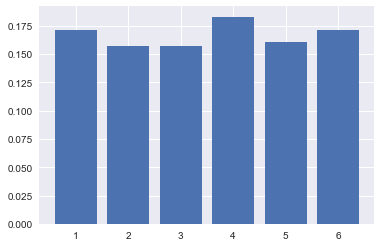

In [11]:
# 一様分布
plt.bar(dice_data,prob_data)
plt.grid(True)

次は、ベルヌーイ分布です。結果が2種類しかない試行をベルヌーイ試行といいます。以下で、その例を見てみましょう。

In [111]:
# ベルヌーイ分布
# 0:head、1:tailと考える
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])
for i in np.unique(coin_data):
    print(i,"が出る確率",len(coin_data[coin_data==i]) / len(coin_data))
    prob_be_data = np.append(prob_be_data,len(coin_data[coin_data==i]) / len(coin_data))

0 が出る確率 0.625
1 が出る確率 0.375


グラフ化すると以下のようになります。

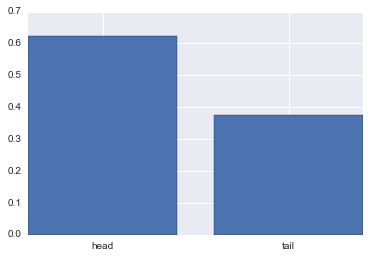

In [112]:
plt.bar([0,1],prob_be_data,align="center")
plt.xticks([0,1], [u'head',u'tail'])
plt.grid(True)

次は、二項分布です。独立なベルヌーイ試行をn回繰り返します。pythonでは、random.binominalを使い、パラメーターは順に、試行回数、確率、サイズを示しています。

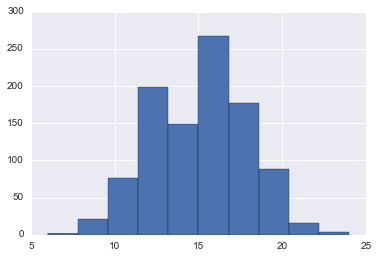

In [34]:
# 二項分布
random.seed(0)
x = random.binomial(30, 0.5,1000)
plt.hist(x)
plt.grid(True)

以下はポアソン分布です。稀な事象が起きる確率の時、使われます。random.poissonを使います。

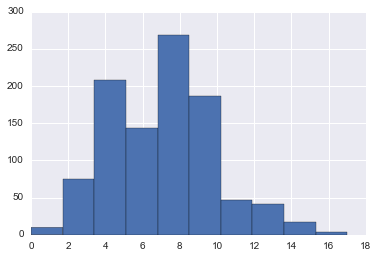

In [49]:
# ポアソン分布
x = random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

次は、正規分布と対数正規分布です。

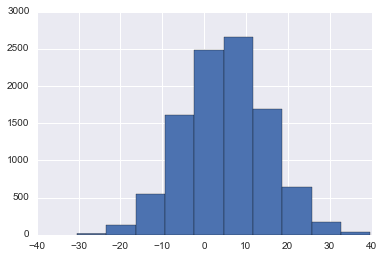

In [50]:
# 正規分布
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

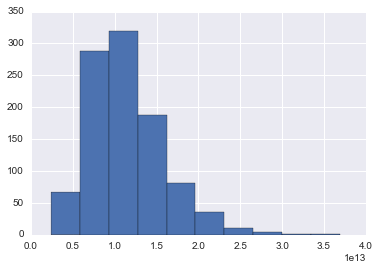

In [51]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

最後にカーネル密度関数について見ていきましょう。これは、与えられたデータを使って、密度関数を推定するものです。先ほどの学生の欠席数データについて、分布の近似になります。以下は、カーネル密度関数を使って、分布を推定しています。ただし、データの性質上、0より小さいものはありえないので、実務で使うときは注意しましょう。

なお、グラフはpandasのデータから作成することができます。

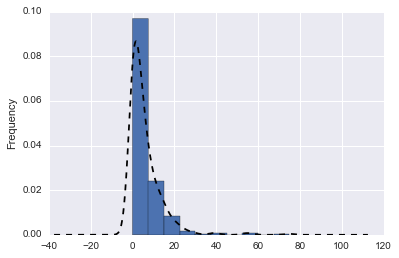

In [60]:
# カーネル密度関数
student_data_math.absences.plot(kind='kde',style='k--')

# 単純なヒストグラム、normed=Trueにすることで、確率で表示
student_data_math.absences.plot(kind='hist', normed = True)
plt.grid(True)

#### <練習問題 1>

平均0、分散1の正規分布からn=100の標本抽出を10000回繰り返して、標本平均$\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i$の経験的な標本分布(ヒストグラム)を描いてください。

#### <練習問題 2>

上記と同じく、対数正規分布の場合を実装してください。

#### <練習問題 3>

学生のデータの数学一期目の成績G1のヒストグラムとカーネル密度推定を描いてください。

***

### 2.1.4 （応用）多次元確率分布
キーワード：同時確率分布、周辺確率関数、条件付き確率関数、条件付き平均、分散共分散行列、多次元正規分布

これまでは、確率変数が1つのみの場合を扱ってきました。次は、確率変数が2つかそれ以上にある場合の確率分布を考えていきましょう。なお、ここは少し応用の範囲になり、難しい場合は、読み流しても後の章に大きな影響はないようにしています。練習問題はありません。

$X$が{$x_0,x_1,...$}、$Y$が{$y_0,y_1,...$}上で値をとる離散型の確率変数を考えます。$X=x_i$と$Y=y_j$である確率を以下のように書くとします。

\begin{eqnarray}
P(X=x_i,Y=y_j) = p_{X,Y}(x_i,y_j)
\end{eqnarray}

これを**同時確率関数**といい、また、

\begin{eqnarray}
p_{X}(x_i) = \sum^\infty_{j=0}p_{X,Y}(x_i,y_j)
\end{eqnarray}

を$X$の**周辺確率関数**といい、$Y$も同様に定義されます。

1変数の時に定義した条件付き確率について、2変数のケースを考えてみましょう。$X=x_i$を与えた時の$Y=y_j$の**条件付き確率関数**を以下のように定義します。

\begin{eqnarray}
p_{Y|X}(y_j|x_i) = P(Y=y_j|X=x_i) =  \frac{p_{X,Y}(x_i,y_j)}{p_X(x_i)}
\end{eqnarray}

また、この条件付き確率関数に関して、期待値をとったものが条件付き期待値であり、$X=x_i$を与えた時の$Y$の**条件付き平均**は、

\begin{eqnarray}
E[Y|X=x_i] = \sum^\infty_{j=0}y_jp_{Y|X}(y_j|x_i) = \frac{\sum^\infty_{j=0}y_jp_{X,Y}(x_i,y_j)}{p_X(x_i)}
\end{eqnarray}

のように定義されます。

2変数における独立の定義は、すべての$x_i$と$y_j$に関して、以下が成り立つ時に、独立であるとします。

\begin{eqnarray}
p_{X,Y}(x_i,y_j) = p_{X}(x_i) p_{Y}(y_j) 
\end{eqnarray}

連続分布についても、同時確率密度関数、周辺確率密度関数、条件付き確率密度関数、独立など定義でき、さらに2つ以上の確率変数の分布についても定義できます。さらに、多変量正規分布やその中で使われる分散共分散行列などもありますが、これらの概念については、参考文献等をみて勉強してください。

参考ですが、この多次元の同時確率密度関数をイメージするために、以下で2次元正規分布を表示させてみましょう。

In [3]:
# 必要なモジュールの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:90:2, 40:160:3]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x 
pos[:, :, 1] = y 

# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
rv = multivariate_normal([50, 100], [[100, 0], [0, 225]])
z = rv.pdf(pos)

上では必要なモジュールを読み込み、2次元の正規分布に従うデータを発生させています。multivariate_normalには、それぞれの平均と分散共分散行列を設定します。以下が、グラフです。

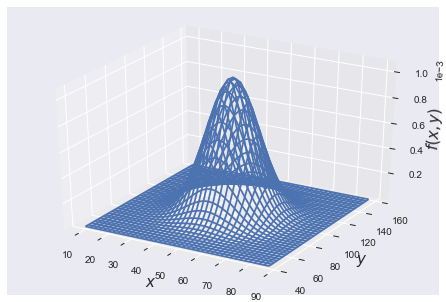

In [13]:
# グラフ化
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# ラベルの設定など
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
ax.set_zlabel(r'$f(x, y)$', fontsize=15)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0, 0)) 

***

### 2.1.5 標本分布
キーワード：標本、母集団、抽出、推測統計学、標本のサイズ、大数の法則、中心極限定理、t分布、カイ二乗分布、F分布

これまでは、実際に得られたデータについての平均や標準偏差等を求めてきました。この手に入れたデータのことを**標本**といいます。しかし、本来はその背後にあるもっと大きなデータ・全体の性質を知ることが重要です。この標本をベースに統計的な分析を実施して、推測しようとする対象全体を**母集団**といい、これが**推測統計学**です。また、標本は母集団から取り出されたもので、これを**抽出**といいます。実際に、観測されたデータ$x_1,,,x_n$について、n個の確率変数$X_1,,,X_n$の実現値であり、このnを標本の**サイズ（大きさ）**といいます。

![dd](http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg)

参照：http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou

次は、確率論で重要な**大数の法則**について学びます。ここで再び先ほどのサイコロを投げて出目を調べる例を考えましょう。

サイコロをどんどん振ってき、それまでの平均値の軌跡をたどります。具体的には、サイコロ1回目が1の時は平均1、次3が出た場合は、(1＋3)/2で平均は2という具合に、続けて平均値を計算していきます。大数の法則とは、この試行を繰り返していく（試行回数Nを大きくする）と、その平均は、期待値(3.5)に近づいていくという法則です。

以下では、サイコロを投げる回数Nを1000で、それを4回実施します（4パス）。以下の結果グラフは、どのパスもNが大きくなればなるほど、3.5に近づいてるのがわかります。

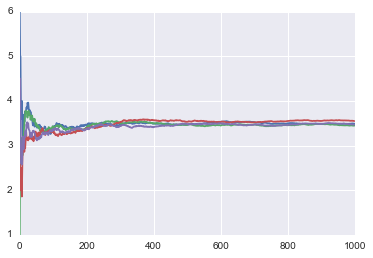

In [291]:
# 大数の法則

# 計算回数
calc_times =10**3
# サイコロ
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1,calc_times + 1)

# 4つのパスを生成
for i in range(1,5):
    random.seed(i)
    cum_variables = random.choice(sample_array,calc_times).cumsum()
    plt.plot(cum_variables / number_cnt)

次は、中心極限定理です。こちらは、Nが増えれば増えるほど、標本平均が正規分布の形になっていく法則です。

In [294]:
# 中心極限定理
def function_central_theory(N):
    
    sample_array = np.array([1,2,3,4,5,6])
    numaber_cnt = np.arange(1,N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1,10**3):   
        random.seed(i)
        cum_variables = random.choice(sample_array,N).cumsum()*1.0
        mean_array = np.append(mean_array,cum_variables[N-1] / N)
 
    plt.hist(mean_array)

それではこの関数を使って、Nをどんどん増やし、そのヒストグラフを見てみましょう。

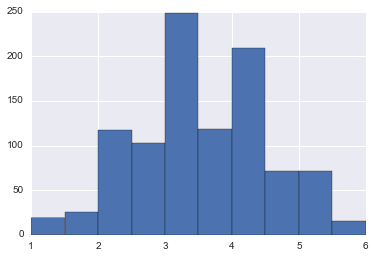

In [295]:
# N=3
function_central_theory(3)

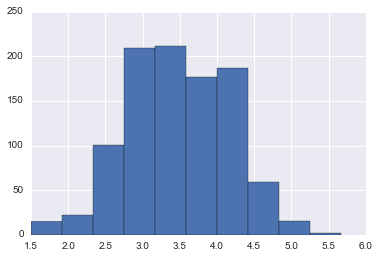

In [128]:
# N=6
function_central_theory(6)

Nをどんどん増やしていくと、正規分布の形になっているのがわかります。

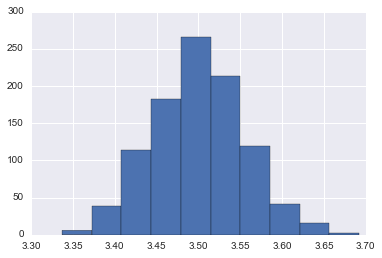

In [127]:
# N= 10^3
function_central_theory(10**3)

次に、代表的な標本分布について学びましょう。

1つ目は**カイ2乗分布**です。m個の確率変数$Z_1,...Z_m$が互いに独立に分布し、各$Z_i$が標準正規分布（平均0，分散1の正規分布）
に従うとします。この時、以下の確率変数の二乗和

\begin{eqnarray}
W = \sum^m_{i=0}Z^{2}_{i}
\end{eqnarray}

は、自由度mのカイ2乗分布に従うと言います。以下が、その分布に従う乱数のヒストグラムです。なお、zipは、複数のシーケンスオブジェクトを取り出すのに使用します。以下ですと、2とb、5とg、20とrがそれぞれdfとcに入り、取り出されます。

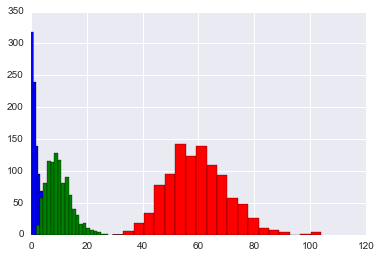

In [111]:
# カイ2乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2,10,60], "bgr"):
    x = random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

次は、ステューデントの**t-分布**です。$Z$と$W$を独立な確率変数として、それぞれ標準正規分布、自由度mのカイ2乗分布に従うとした時、

\begin{eqnarray}
T = \frac{Z}{\sqrt{\frac{W}{m}}}
\end{eqnarray}

とおいた時、Tは自由度mのステューデントのt-分布に従うといいます。以下はt分布のサンプル図です。

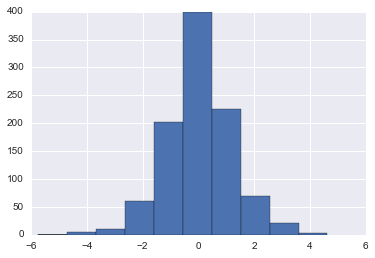

In [188]:
# t-分布
x = random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

最後に、**F分布**についても紹介します。$W_1$と$W_2$を独立な確率変数、それぞれ自由度$m_1,m_2$のカイ2乗分布に従うとして、

\begin{eqnarray}
F = \frac{\frac{W_1}{m_2}}{\frac{W_2}{m_2}}
\end{eqnarray}

とおいた時、$F$は自由度$(m_1,m_2)$のスネディッカーのF-分布に従うといいます。以下は、F分布のサンプル図です。

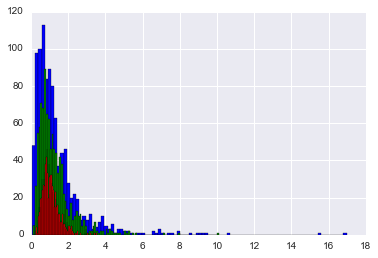

In [187]:
# F 分布
for df, c in zip([ (6,7), (10,10), (20,25)], "bgr"):
    x = random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

以上で代表的な分布についての紹介は終わります。他にも、いろいろな分布がありますので、必要が生じた場合にその都度調べてみましょう。

#### <練習問題 1>

自由度5、25、50のカイ二乗分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

#### <練習問題 2>

自由度100のt分布からの乱数を1000個発生させて、ヒストグラムを書いてください。

#### <練習問題 3>

自由度(10,30)、(20,25)のF分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

***

### 2.1.6 統計的推定
キーワード：推定量、点推定、不偏性、不偏推定量、一致性、区間推定、信頼区間、信頼係数、最尤法、尤度、尤度関数、ベイズ法

ここでは「推定」について学んでいきます。母集団から標本を抽出し、それに基づいて母集団の確率分布、平均、分散の推測をするのですが、その時に標本の平均や分散を使って推定します。ここで、大きさnの無作為標本{$X_1,...,X_n$}をもとに、母平均$\mu$を求める(推定する)方法を考えると、標本平均は、

\begin{eqnarray}
\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i
\end{eqnarray}

となります。これを一般化すると、以下のように確率変数の関数として記述でき、これを**推定量**といいます。母数を推定するための式で、母集団のパラメータの値（$\theta$）を観測される標本に基づいて言い当てることを**点推定**といいます。

\begin{eqnarray}
\overline{X}=T(X_1,...,X_n)
\end{eqnarray}

ただし、関数としてなんでも良いというわけではなく、パラメータをより正確に推定できることが望ましいです。そのための判断基準として、**不偏性**と**一致性**という性質があります。

推定量の期待値が母数$\theta$と一致するとき、推定量は**不偏**であるといい、この不偏性をもつ推定量を**不偏推定量**といいます。

\begin{eqnarray}
E[T(X_1,...,X_n)]=\theta
\end{eqnarray}

一致性とは、$\theta$の推定量$E[T(X_1,...,X_n)]$が観測個数nが大きくなるにつれて、$\theta$に近づいていくという性質であり、任意の$\epsilon>0$に関して、以下のように表現できます。このとき、$T(X_1,...,X_n)$を一致推定量といいます。

\begin{eqnarray}
\displaystyle \lim_{n \to \infty} P[|T(X_1,...,X_n)- \theta |\ge \epsilon]=0
\end{eqnarray}

次は、区間推定です。点推定では、母数を1点で求めましたが、区間推定は母数が入っていそうな区間を推定します。まず、$X_1,...,X_n$が正規分布$N(\mu ,1)$から無作為抽出されていて、これらから母数$\mu$を推定する場合を考えてみましょう。この場合、標本平均$\overline{X}$は正規分布$N(\mu , \frac{1}{n})$に従うため、正規分布の両側$\alpha$点を$z_{\alpha /2}$として、

\begin{eqnarray}
P(-z_{\alpha /2} \le \sqrt{\mathstrut n} (\overline{X} - \mu ) \le z_{\alpha /2} )=1-\alpha
\end{eqnarray}

が成り立ちます。この式を書き換えると、

\begin{eqnarray}
P(\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} \le \mu \le \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}})=1-\alpha
\end{eqnarray}

と書くことができ、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$ を$\mu$の推定のための区間として用いることができます。このとき、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$を**信頼係数**$1-\alpha$の**信頼区間**といいます。信頼区間の一般的な定義は以下のようになります。

$X_1,...,X_n$を母集団分布$f(x;\theta)$からの無作為標本として、$\theta$は1次元の母数とします。${\bf X}=(X_1,...,X_n)$とおくと、2つの統計量$L({\bf X}),U({\bf X})$がすべての$\theta$について以下を満たす時、区間$[L({\bf X}),U({\bf X})]$を**信頼係数**$1-\alpha$の**信頼区間**といいます。

\begin{eqnarray}
P(L({\bf X})\le \theta \le U({\bf X})) \ge 1-\alpha
\end{eqnarray}

最後に、推定量を求める方法、最尤法、ベイズ法について簡単に解説します。（他にモーメント法などもありますので、調べてみてください。）

・最尤法

同時確率関数を学んだ時に、母数を与えられて、観測値が生じる確率を求めましたが、逆に、観測値を与えられた時に、確率関数を母数の関数とみなしたものが**尤度関数**になります。この最尤法とは、尤度関数を最大化する母数を母数の推定値とする方法です。

今、確率関数$f(x;\theta)$を与えられているとして、その母集団からの無作為標本$X_1,...,X_n$をとり、${\bf X}=(X_1,...,X_n)$とします。この${\bf X}$の実現値${\bf x}=(x_1,...,x_n)$における同時確率関数を$\theta$の関数とみなして、以下のように尤度関数を定義します。

\begin{eqnarray}
L(\theta;{\bf x})=f(x_1;\theta) \times...\times f(x_n;\theta)
\end{eqnarray}

尤度関数は、積の形をしており、対数変換によって和に直した方が計算しやすいため、以下のように**対数尤度関数**に直します。

\begin{eqnarray}
\log L(\theta;{\bf x})=\sum^n_{i=1} \log f(x_i;\theta)
\end{eqnarray}

上記の最大値を求めるために、微分して0になる解$\theta$を求めます。以下の方程式を**尤度方程式**、この解$\theta$を**最尤推定量**といいます。これが最尤推定法になります。

\begin{eqnarray}
\frac{d}{d\theta}{\log L(\theta;{\bf x})}= 0
\end{eqnarray}

・ベイズ法

今までは、母数$\theta$に対して何も情報がなく、頻度論的なアプローチで推定をしていましたが、この$\theta$について、事前分布を仮定して、ベイズの公式を使い、事後分布に更新していくことをベイズ法といいます。

ここで、標本から得られる尤度関数を$p(x|\theta)$として、母数$\theta$が事前確率$\pi(\theta)$に従うと仮定すると、ベイズの公式により、事後分布を以下のように求めることができます。

\begin{eqnarray}
\pi(\theta|x) = \frac{p(x|\theta)\pi(\theta)}{\int p(x|\theta)\pi(\theta) d\theta}
\end{eqnarray}

#### <練習問題 1>
平均$\mu$で分散$\sigma^2$の正規母集団から大きさnの標本から作った標本平均は、母平均であることが望ましく、この不偏性を示してください。（手計算で大丈夫です。）

#### <練習問題 2>
あるコインを5回投げたとして、裏、表、裏、表、表と出ました。このコインの表が出る確率を$\theta$として、これを推定してください。（手計算で大丈夫です。）

#### <練習問題 3>
母集団が以下の指数分布に従っている時に、そこから大きさnの標本${X_1,X_2,...X_n}$を得たとして、母数${\lambda}$を最尤推定してください。（手計算で大丈夫です。）
\begin{eqnarray}
f(x|\lambda) = \lambda \mathrm{e}^{-\lambda x}
\end{eqnarray}

***

### 2.1.7 統計的検定
キーワード：帰無仮説、対立仮説、有意、棄却、有意水準、第1種の過誤、第2種の過誤、検出力

さて、長く数式の説明が続いたので、ここで再び「学生のデータ」に戻りましょう。練習問題でもやりましたが、まずは、数学とポルトガル語の成績の平均を計算してみると、以下のようになります。

In [22]:
import pandas as pd

student_data_por = pd.read_csv("student-por.csv",sep=";")
student_data_merge = pd.merge(student_data_math
                              ,student_data_por
                              ,on=["school","sex","age","address","famsize","Pstatus","Medu"
                                   ,"Fedu","Mjob","Fjob","reason","nursery","internet"]
                              ,suffixes=('_math', '_por'))

print("G1数学の成績平均：",student_data_merge.G1_math.mean())
print("G1ポルトガル語の成績平均：",student_data_merge.G1_por.mean())

G1数学の成績平均： 10.8612565445
G1ポルトガル語の成績平均： 12.112565445


数字を見ていると、若干ではありますが、数学の方が悪いように見えます。しかし、果たしてこれは本当に差があるのかいえないのか、それが問題となります。これを考えていくのが検定というアプローチです。仮説として、母集団において差がないとしましょう。つまり、以下の式が成り立つとします。

\begin{eqnarray}
\mu_{math} = \mu_{por}
\end{eqnarray}

ここで、$\mu_{math}$と$\mu_{por}$はそれぞれの母平均とします。この等しいという仮説を**帰無仮説**といい、$H_{0}$とします。一方、帰無仮説の否定の、2つの間に差があるという仮説

\begin{eqnarray}
\mu_{math} \neq \mu_{por}
\end{eqnarray}

を**対立仮説**といい、$H_{1}$と表します。次に、先ほどの$H_{0}$を正しいとした場合に、統計的なアプローチを取り、それが起こることはありえない（例えば、確率が5%未満になる）ということが言えたとします。この時、この$H_{0}$は**棄却**されるといい、対立仮説が採択され、よって差があることがいえることになります。また、先ほど5%未満としましたが、これを**有意水準**5%で、統計的な差がある(**有意**である)といいます。有意水準は**α**で表され、α=5%やα=1%がよく使われます。また、**p-value**(**p値**)とは、帰無仮説が正しいとした場合に、データから計算された統計量以上に極端な統計量が観測される確率です。p値が低いほど、$H_{0}$が正しいとした場合に、ありえないことが起きたということになります。


それでは、これらの概念を使って、計算してみましょう。 stats.ttest_relを使います。

In [26]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( "p値 = ",p)

p値 =  1.65365552171e-16


有意水準1%で、差があると結論づけることができました。

ここでは、有意水準1%だと帰無仮説が棄却されましたが、もしかすると帰無仮説が正しかったということもありえます。このように、帰無仮説が正しいにもかかわらず、棄却してしまうことを**第1種の過誤**といいます。別名、あわてものの誤りとも言われます。一方、この帰無仮説が誤っているにもかかわらず受容してしまうことを、**第2種の過誤**といい、その確率を**β**で表します。このβの補数1-βは**検出力**と呼ばれ、帰無仮説が誤っているときに正しく棄却できる確率を表します。この第2種の過誤は誤っているのに見過ごしているので、ぼんやりものの誤りともいわれます。一般的に1-βは0.8程度ほしいといわれています。しかし、αとβは片方を小さくすると、もう片方は大きくなる関係にあります。また、βは重要な量ですが、値を計算するにはサンプルサイズや効果量が必要になるため、ここでは概念の紹介に留めておきます。

様々な分野で使用されている検定ですが、注意点があります。実は検定はビッグデータの解析には向いていないのです。まず第一に、異なる母集団の母数が互いに厳密に等しいことは、実世界ではほぼあり得ません。サンプルサイズを大きくすると、それにともなって検出力1-βが大きくなり、実務的には等しいと考えていいような微妙な差であってもp値が小さくなり、帰無仮説が棄却されてしまいます。つまり、ビッグデータに対して検定を行うと大抵の場合、高度に有意な(p値がかなり小さい)結果になってしまうのです。

また、検定で高度に有意な結果になったとしても、2つの母数は大きく異なるという事は結論付けられません。2つの値がどの程度異なるかに関しては検定からはわからないのです。どの程度の差があるかを知りたい場合には前節で用いた信頼区間を用いるのが効果的です。

以上で、検定までの単元は終了です。この単元は幅が広く、この講座では扱いきれない量ですが、もし今までに統計や確率について学ぶ機会がなかった場合は、はじめに紹介した参考文献等を見ながら是非一通り勉強してみてください。

#### <練習問題 1>

上記と同じデータで、数学とポルトガル語の成績のG2のそれぞれの平均について、差があると言えるでしょうか。また、G3はどうでしょうか。

#### <練習問題 2>

上記と同じデータで、それぞれの欠席数については、差があるといえるでしょうか。

#### <練習問題 3>

上記と同じデータで、それぞれの勉強時間についてはどうでしょうか。

***

### 2.1.8 単回帰分析
キーワード：sklearn、目的変数、説明変数、単回帰分析、最小二乗法、決定係数

やっと最後の単元となりました。長い道のりでしたが、もう少しで２章は終わりです。最後のこの章のしめとして、機械学習の入り口である単回帰分析について学びましょう。

これから考える問題は回帰問題といい、数値を予測する問題です。先ほど、学生のデータについて、一期目の数学の成績と最終期の数学の成績をグラフ化（散布図）してみました。この散布図からG1とG3には関係がありそうだというのはわかります。

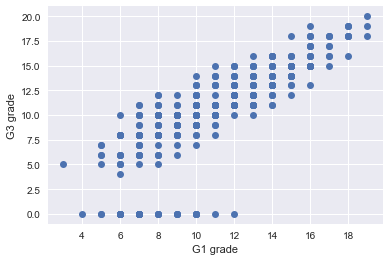

In [23]:
# 散布図
plt.plot(student_data_math.G1,student_data_math.G3,'o')
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")
plt.grid(True)

回帰問題では、与えられたデータから関係式を仮定して、データに最も当てはまる係数を求めていきます。具体的には、あらかじめG1という成績が分かった上で、G3の成績を予測することになります。つまり、目的となる変数G3（**目的変数**といいます）があり、それを説明する変数G1（**説明変数**といいます）を使って予測します。これは後ほど機械学習の章で学ぶ「教師あり学習」になり、学習時のデータに正解を1つ1つ与えて、その関係性を計算する方法です。

単回帰分析は、このアウトプットとインプットの関係が１変数のみで成り立つ式を仮定して解いていきます。（なお、インプットデータが２変数以上ある場合は、重回帰分析と言い、後の章で学びます。）

ここでは、線形単回帰というアウトプットとインプットが線形の関係に成り立つ（y = ax +b）という仮定のもと、式を立てて計算してみましょう。線形単回帰分析は、以下のsklearnモジュールのlinear_modelを使います。sklearnは機械学習のためのモジュールで、後の機械学習の章でさらに色々な計算ができることを学んでいきます。

In [25]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
clf = linear_model.LinearRegression()

以下では、説明変数（Xとします）と目的変数（Yとします）データをセットして、線形回帰のfitを使って、予測モデルを計算します。

この時、**最小二乗法**という手法で係数と切片を計算しています。この方法は、実際の目的変数のデータと予測したデータの差の二乗和をとり、それが最小になる時の係数と切片を求めています。式で表現すると、yを実測値、f(x)=ax+bを予測値として、以下の式を最小にするように計算しています。

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

In [29]:
# 説明変数に "一期目の数学の成績" を利用
# marixの型に直しているので、注意
X = student_data_math.loc[:, ['G1']].as_matrix()

# 目的変数に "最終の数学の成績" を利用
Y = student_data_math['G3'].as_matrix()
 
# 予測モデルを計算
clf.fit(X, Y)
 
# 回帰係数
print("回帰係数:",clf.coef_)
 
# 切片 
print("切片:",clf.intercept_)

回帰係数: [ 1.106]
切片: -1.6528038288


上記の回帰係数が線形の回帰式y=ax+bのaで、切片がbとなります。先ほどの散布図と一緒に、予測した線形回帰式を書いてみましょう。Yを予測したい最終の数学の成績G3は、predict(説明変数)で計算できます。

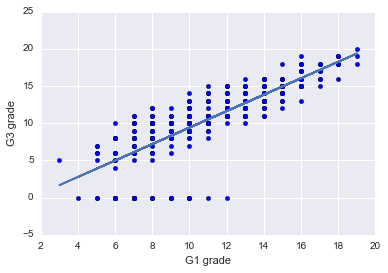

In [109]:
# 先ほどと同じ散布図
plt.scatter(X, Y)
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")

# その上に線形回帰直線を引く
plt.plot(X, clf.predict(X))
plt.grid(True)

グラフから予測式は実測値をうまく予測しているようにも見えますが、これが客観的にどうなのかというのは判断がつきません。そこで、それを数値化したものが、**決定係数** R$^2$で、R$^2 =1-\frac{\sum_{i=1}^{n} (y_i -f(x_i) )^2}{\sum_{i=1}^{n} (y_i -\bar{y})^2}$で定義されます。これは0から1までの値を取り、1に近ければ近いほど良いモデルになります。実装では、scoreを使って以下のように算出します。

In [30]:
 # 決定係数、寄与率とも呼ばれる
print("決定係数:",clf.score(X, Y))

決定係数: 0.642350846052


なお、この決定係数の数値がどこまで高ければ良いのかという問題はあります。教科書的なデータや問題では0.9以上の場合が多いですが、実務ではなかなかそこまで出せる結果はなく、それをどう判断するかはケースバイケースです。ちなみに、上の0.64は高くはないですが、現場レベルで見ると、使えないレベルではありません。

以上で、単回帰分析と1章の説明は終わりになります。残りは、練習問題と総合演習問題になりますので、ぜひチャレンジしてください。

#### <練習問題 1>

student-por.csvのデータを使って、G3を目的変数、G1を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。

#### <練習問題 2>

上のデータの実際の散布図と、回帰直線を合わせてグラフ化してください。

#### <練習問題 3>

student-por.csvのデータを使って、G3を目的変数、absences(欠席数)を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。この結果を見て、考察してみましょう。

***

## 2.2 総合問題

### 2.2.1 統計の基礎

以下のサイトにあるデータ（ワインの品質）を読み込み、以下の問いに答えてください。

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

（１）基本統計量（平均、最大値、最小値、標準偏差など）を算出してください。

（２）それぞれの変数の分布と、それぞれの変数の関係性（2変数間のみ）がわかるように、グラフ化してみましょう。何かわかる傾向はありますか。

### 2.2.2 ローレンツ曲線とジニ係数

2.1の記述統計で使用したstudent_data_mathのデータを使って、以下の問いに答えてください。

（１）一期目の数学データについて、男女別に昇順に並び替えをしてください。そして、横軸に人数の累積比率、縦軸に一期目の値の累積比率をとってください。この曲線をローレンツ曲線といいます。このローレンツ曲線を男女別に一期目の数学成績でグラフ化してください。

（２）不平等の程度を数値で表したものをジニ係数といいます。この値は、ローレンツ曲線と45度線で囲まれた部分の面積の2倍で定義されて、0から1の値を取ります。値が大きければ大きいほど、不平等の度合いが大きくなります。なお以下のようにジニ係数は定義できます。$\overline{x}$は平均値です。

\begin{eqnarray}
GI=\sum_{i}\sum_{j}\left| \frac{x_i-x_j}{2n^2 \overline{x}}\right|
\end{eqnarray}

これを利用して、男女の一期目の成績について、ジニ係数をそれぞれ求めてください。